## inicializacao / starting



In [6]:
# lendo bibliotecas / reading libraries

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

from scipy.stats import t

from scipy.stats import ttest_ind

from scipy.stats import levene

In [7]:
# lendo arquivos / reading files

try:
    sql01 = pd.read_csv("/datasets/moved_project_sql_result_01.csv")

except FileNotFoundError:
    sql01 = pd.read_csv("moved_project_sql_result_01.csv")


In [8]:
# lendo arquivos / reading files

try:
    sql04 = pd.read_csv("/datasets/moved_project_sql_result_04.csv")

except FileNotFoundError:
    sql04 = pd.read_csv("moved_project_sql_result_04.csv")

In [9]:
# lendo arquivos / reading files

try:
    sql07 = pd.read_csv("/datasets/moved_project_sql_result_07.csv")

except FileNotFoundError:
    sql07 = pd.read_csv("moved_project_sql_result_07.csv")

## carregando dados / loading data

In [11]:
# visualizando informacoes / visualizing info

sql01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
# verificando valores duplicados / verifying duplicated values

sql01.duplicated().value_counts()

False    64
Name: count, dtype: int64

In [13]:
sql01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [14]:
sql04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# verificando valores duplicados / verifying duplicated values

sql04.duplicated().value_counts()

False    94
Name: count, dtype: int64

In [16]:
sql04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [17]:
sql07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
sql07.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [19]:
# verificando valores duplicados / verifying duplicated values

sql07.duplicated().value_counts()

False    871
True     197
Name: count, dtype: int64

In [20]:
# visualizando dados duplicados / visualizing duplicated data

sql07[sql07.duplicated(subset=['start_ts', 'weather_conditions', 'duration_seconds'])]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [21]:
# deletando valores duplicados / deleting duplicated values 

sql07 = sql07.drop_duplicates(subset=['start_ts', 'weather_conditions', 'duration_seconds'], keep='first')

In [22]:
sql07.duplicated().value_counts()

False    871
Name: count, dtype: int64

Nenhum dado ausente foi encontrado. Porem irei modificar os dados em 'average_trips' de float para int.
Em SQL07 os dados de 'start_ts' foram transformados em dados de data. Os valores duplicados encontrados foram deletados

/ 

No missing values were found but I will modify the data in 'average_trips' from float to int. In SQL07 data from 'start_ts' were converted to date type. Its duplicated values were deleted.



## modificando tipo de dados / modifying data type

In [25]:
# modficando dados em 'average_trips'

sql04['average_trips'] = sql04['average_trips'].astype(int)

In [26]:
sql04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [27]:
# convetendo dados para formato de data / converting to date format

sql07['start_ts'] = pd.to_datetime(sql07['start_ts'])

In [28]:
sql07.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


## analise de dados / data analysis

### destino / destination

In [31]:
# salvando os 10 bairros com maior media de viagens / saving top 10 average destinations

top10_neighborhood = sql04.nlargest(10, 'average_trips')


In [32]:
top10_neighborhood.describe()

,average_trips
count,10.00000
mean,4324.40000
std,3530.15559
min,1259.00000
25%,1649.50000
50%,2483.00000
75%,6288.75000
max,10727.00000


In [33]:
top10_neighborhood.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


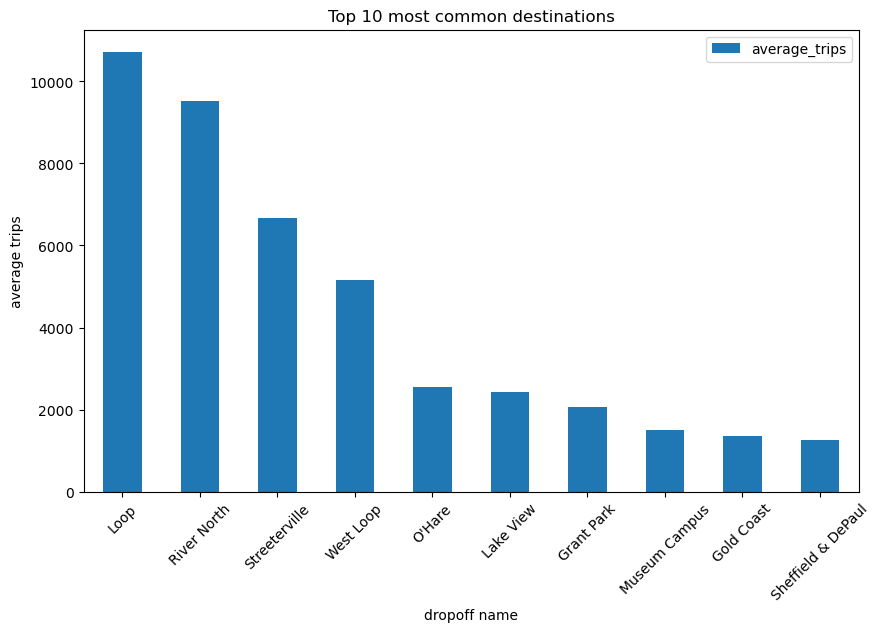

In [34]:
# plotando o top 10 destinos mais comuns / ploting top 10 most common destinations

top10_neighborhood.plot(kind='bar', figsize=(10, 6), stacked=True, x='dropoff_location_name', y='average_trips')
plt.xlabel('dropoff name')
plt.ylabel('average trips')
plt.title('Top 10 most common destinations')
plt.xticks(rotation=45)
plt.show()


    Observamos os 10 bairros mais populares para destino, os quatro primeiros se destacam em relação aos outros.
    
    
    Here we see top 10 neighborhoods, the top 4 stood out in comparision with the other ones.

### companhia / company

In [37]:
# salvando os 10 mais populares empresas de taxi /  top 10 cab company

top10_cab_company = sql01.nlargest(10, 'trips_amount')

In [38]:
top10_cab_company.describe()

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000


In [39]:
top10_cab_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


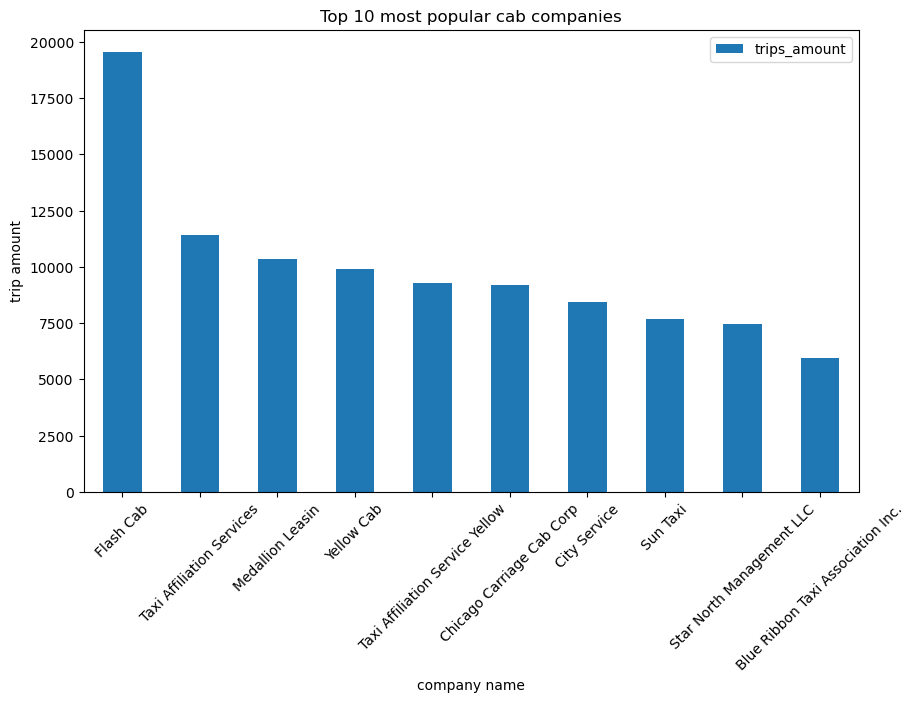

In [40]:
# plotando o top 10 empresas mais populares / ploting top 10 most poppular cab companies

top10_cab_company.plot(kind='bar', figsize=(10, 6), stacked=True, x='company_name', y='trips_amount')
plt.xlabel('company name')
plt.ylabel('trip amount')
plt.title('Top 10 most popular cab companies')
plt.xticks(rotation=45)
plt.show()

    observamos aqui as dez companhias mais populares de taxi, chama a atenção a primeira colocada ter 41% a mais viagens que a segunda colocada
    
    
    Here we see the top 10 cab companies, it stands out the 1st company to have 41% more trips than the 2nd busiest one.

## testando hipotese / testing hypotesis

Hipotese Nula : A duração media dos passeios do Loop para o Aeroporto O'Hare são iguais nos sabados chuvosos

Hipotese Alternativa :A duração media dos passeios do Loop para o Aeroporto O'Hare nos sabados chuvosos são diferentes

In [44]:
# filtrando dados com clima 'bom' / filtering data of 'good' weather

good_weather = sql07.query('weather_conditions == "Good"')

In [45]:
# filtrando dados com clima 'ruim' / filtering data of 'bad' weather

bad_weather = sql07.query('weather_conditions == "Bad"')

In [47]:
# utilizando teste de levene para definir se equal_var = False ou True

statistic, p_value = levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

In [48]:
# definindo valor alpha / defining alpha value

alpha = 0.05

In [49]:
# resultado do teste de levene / levene test result

print("Levene's test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 0.000586951625283602
p-value: 0.9806770360671218


In [50]:
# funcao if para demonstrar se equal_var e falso ou verdadeiro / if function to show if equal_var is true or false

if p_value < alpha:
    equal_var = False
else:
    equal_var = True

In [51]:
# ttest entre a media de duracao de segundos / ttset between duration seconds average

results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var = equal_var)

In [52]:
# imprimindo p-valor / printing p-value

print('p-value :', results.pvalue)

p-value : 7.397770692813658e-08


In [53]:
# resultado do teste / test result

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula / Reject null hypotesis')
else:
    print("Nós não podemos rejeitar a hipótese nula / We can't reject null hypotesis")

Rejeitamos a hipótese nula / Reject null hypotesis


## Conclusao / Conclusion

Conseguimos identificar as 10 companhias de taxi mais populares, sendo a primeira mais poupular ter 41% mais viagens que a segunda colocada. Não há muita diferença entre as outras colocadas.

Entre os destinos de bairros mais populares 'Loop' é o mais popular, o aeroporto fica na quinta posição apenas.

No resultado do teste, podemos rejeitar a hipótese nula de que o tempo médio de viagem é o mesmo entre dias com clima bom e ruim.